In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
bc = pd.read_csv(r'datasets\datasets\breast_cancer.csv')

In [4]:
bc.head()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong


In [6]:
bc.isnull().sum()

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [7]:
bc['cell_size_uniformity'].mode()[0]

1.0

In [8]:
bc['cell_size_uniformity'].fillna(bc.cell_size_uniformity.mode()[0],inplace = True)

In [9]:
bc.isnull().sum()

patient_id               0
clump_thickness          1
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [14]:
for column in bc[['clump_thickness', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli']]:
    mode = bc[column].mode()[0]
    bc[column] = bc[column].fillna(mode)

In [15]:
bc.isnull().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [17]:
bc.drop(['doctor_name','patient_id'],axis=1,inplace=True)

In [18]:
bc.head()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5.0,1.0,1,1,2,1,3.0,1.0,1,benign
1,5.0,4.0,4,5,7,10,3.0,2.0,1,benign
2,3.0,1.0,1,1,2,2,3.0,1.0,1,benign
3,6.0,8.0,8,1,3,4,3.0,7.0,1,benign
4,4.0,1.0,1,3,2,1,3.0,1.0,1,benign


In [20]:
print("No. of people without breast_cancer: ",bc["class"].value_counts()[0])
print("No. of people with breast_cancer : ",bc["class"].value_counts()[1])
print("Percent of people with breast_cancer : ",round(bc["class"].value_counts()[1]/len(bc.index)*100,2), "%")
# y is class, and rest columns are x

No. of people without breast_cancer:  458
No. of people with breast_cancer :  241
Percent of people with breast_cancer :  34.48 %


In [21]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   clump_thickness        699 non-null    float64
 1   cell_size_uniformity   699 non-null    float64
 2   cell_shape_uniformity  699 non-null    int64  
 3   marginal_adhesion      699 non-null    int64  
 4   single_ep_cell_size    699 non-null    int64  
 5   bare_nuclei            699 non-null    object 
 6   bland_chromatin        699 non-null    float64
 7   normal_nucleoli        699 non-null    float64
 8   mitoses                699 non-null    int64  
 9   class                  699 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 54.7+ KB


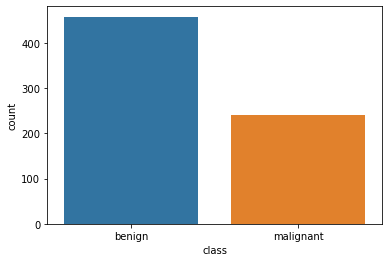

In [23]:
sb.countplot("class",data=bc)

In [24]:
bc['class'] = bc['class'].map({'benign':0,'malignant':1})

In [28]:
bc['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

In [32]:
bc.dtypes

clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                      int64
dtype: object

In [35]:
bc["bare_nuclei"].replace({"?": bc['bare_nuclei'].mode()[0]}, inplace=True)
print(bc)

     clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0                5.0                   1.0                      1   
1                5.0                   4.0                      4   
2                3.0                   1.0                      1   
3                6.0                   8.0                      8   
4                4.0                   1.0                      1   
..               ...                   ...                    ...   
694              3.0                   1.0                      1   
695              2.0                   1.0                      1   
696              5.0                  10.0                     10   
697              4.0                   8.0                      6   
698              4.0                   8.0                      8   

     marginal_adhesion  single_ep_cell_size bare_nuclei  bland_chromatin  \
0                    1                    2           1              3.0   
1                  

In [36]:
bc.dtypes

clump_thickness          float64
cell_size_uniformity     float64
cell_shape_uniformity      int64
marginal_adhesion          int64
single_ep_cell_size        int64
bare_nuclei               object
bland_chromatin          float64
normal_nucleoli          float64
mitoses                    int64
class                      int64
dtype: object

In [42]:
bc['bare_nuclei']=bc['bare_nuclei'].astype(str).astype(int)

In [43]:
bc['bare_nuclei'].dtypes

dtype('int32')

C:\Users\Vish\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


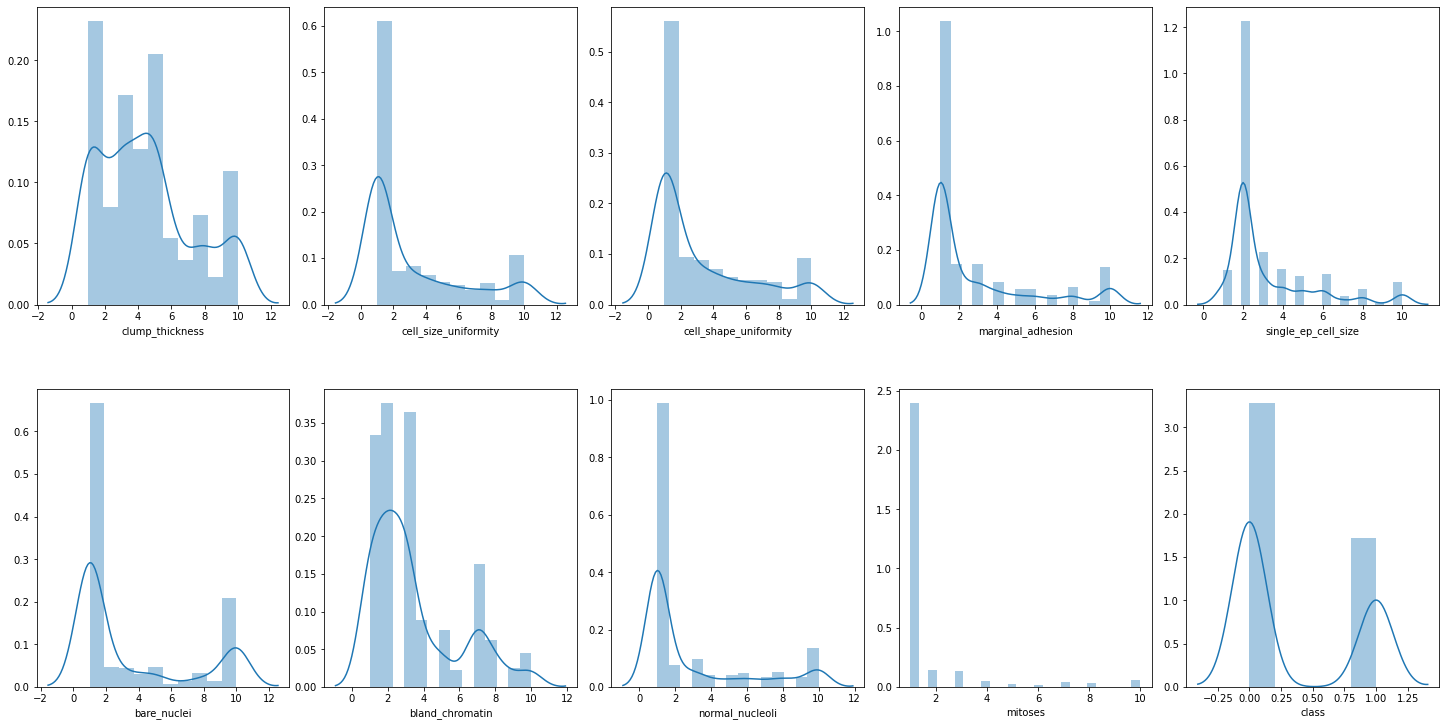

In [44]:
#5.Draw distribution plot on all the input features
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten() # to flaten to 1d
for k,v in bc.items():
    sb.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)
plt.show()

In [45]:
x=bc.iloc[:,:9]

In [46]:
x

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5.0,1.0,1,1,2,1,3.0,1.0,1
1,5.0,4.0,4,5,7,10,3.0,2.0,1
2,3.0,1.0,1,1,2,2,3.0,1.0,1
3,6.0,8.0,8,1,3,4,3.0,7.0,1
4,4.0,1.0,1,3,2,1,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1,1,3,2,1.0,1.0,1
695,2.0,1.0,1,1,2,1,1.0,1.0,1
696,5.0,10.0,10,3,7,3,8.0,10.0,2
697,4.0,8.0,6,4,3,4,10.0,6.0,1


In [48]:
y=bc.iloc[:,9]

In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
log=LogisticRegression()

In [52]:
log.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=log.predict(x_test)

In [54]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1], dtype=int64)

In [55]:
y_test

584    0
417    0
606    0
349    1
134    0
      ..
426    0
119    0
82     0
329    1
305    1
Name: class, Length: 140, dtype: int64

In [59]:
accuracy_score(y_pred,y_test)*100

96.42857142857143

In [58]:
log.score(x_train,y_train)*100

96.6010733452594

In [60]:
confusion_matrix(y_pred,y_test)

array([[91,  4],
       [ 1, 44]], dtype=int64)

In [61]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(x_train, y_train)

GaussianNB()

In [62]:
y_pred = nvclassifier.predict(x_test)

In [63]:
accuracy_score(y_pred,y_test)

0.9642857142857143

In [65]:
nvclassifier.score(x_train,y_train)

0.960644007155635